In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
salaries = pd.read_csv('data/2021/WR_2021-22_Salaries.csv').drop('Unnamed: 0', axis=1)
receivers = pd.read_csv('data/2021/receiving.csv').drop('Unnamed: 0', axis=1)
joined = pd.merge(salaries, receivers, on='Name', how='inner')

In [24]:
reformattedSalaries = []
for x in joined['Salary']:
    x = int(x.replace(',',''))
    reformattedSalaries.append(x)
joined['Salary'] = reformattedSalaries
joined['Salary(Ms)'] = joined['Salary'] / 1000000

In [25]:
joined.to_csv('data/forTooltipCharting/0002.csv')

In [26]:
joined.describe()

,Salary,Age,G,GS,Tgt,Rec,Yds,Y/R,TD,1D,Lng,Y/Tgt,R/G,Y/G,Fmb,Salary(Ms)
count,1.110000e+02,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,3.404749e+06,24.873874,12.153153,7.351351,61.495495,39.135135,492.828829,12.372072,3.081081,23.594595,40.531532,7.596396,2.818018,35.193694,0.612613,3.404749
std,4.354885e+06,2.700563,4.973015,6.279329,50.886304,34.118640,440.718481,4.601959,3.511371,21.101219,20.630436,3.519347,2.008944,25.865861,1.019547,4.354885
min,7.050000e+05,21.000000,1.000000,0.000000,1.000000,1.000000,5.000000,4.000000,0.000000,0.000000,5.000000,1.300000,0.100000,0.800000,0.000000,0.705000
25%,8.867605e+05,23.000000,9.000000,1.000000,13.500000,7.500000,73.500000,10.100000,0.000000,4.000000,23.000000,5.800000,1.000000,10.950000,0.000000,0.886761
50%,1.036586e+06,24.000000,14.000000,6.000000,57.000000,34.000000,434.000000,12.400000,2.000000,21.000000,41.000000,7.500000,2.500000,35.700000,0.000000,1.036586
75%,3.948500e+06,27.000000,16.500000,13.500000,104.000000,63.500000,827.000000,14.000000,5.000000,37.000000,55.000000,8.650000,4.450000,55.250000,1.000000,3.948500
max,2.000000e+07,32.000000,17.000000,17.000000,191.000000,145.000000,1947.000000,38.000000,16.000000,89.000000,91.000000,34.000000,8.500000,114.500000,5.000000,20.000000


In [27]:
interesting = pd.DataFrame()
interesting['Name'] = joined['Name']
interesting['Yds'] = joined['Yds']
interesting['TD'] = joined['TD']
interesting['Team'] = joined['Team']
interesting['SalaryPerYard'] = round(joined['Salary'] / joined['Yds'], 2)
interesting['SalaryPerTD'] = round(joined['Salary'] / joined['TD'], 2)
interesting['ReceptionsPerTarget'] = round(joined['Rec'] / joined['Tgt'], 2)

In [28]:
data = joined.loc[joined['Yds'] > 999].set_index('Name').reset_index()
data = data[['Name','Salary','Yds','TD']]
data = data.sort_values('TD', ascending=False).set_index('Name').reset_index()

In [29]:
data['Salary'] = data['Salary'].apply(lambda x: "${:.2f}m".format((x/1000000)))

In [34]:
team = joined.groupby(by='Team').sum()
team = team[['Salary','Yds','TD','Salary(Ms)']]

In [50]:
perYard = joined[['Name','Salary','Tgt','Rec','Yds','TD','Salary(Ms)']]
perYard['DollarsPerYard'] = round(perYard['Salary'] / perYard['Yds'], 2)
perYard.sort_values('DollarsPerYard', ascending=True).head(20)

<ipython-input-50-93ff57b2a6c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perYard['DollarsPerYard'] = round(perYard['Salary'] / perYard['Yds'], 2)


,Name,Salary,Tgt,Rec,Yds,TD,Salary(Ms),DollarsPerYard
87,Ja'Marr Chase,825000,128,81,1455,13,0.825000,567.01
105,Jaylen Waddle,825000,140,104,1015,6,0.825000,812.81
56,Tyreek Hill,1035000,159,111,1239,9,1.035000,835.35
75,Darnell Mooney,895000,140,81,1055,4,0.895000,848.34
88,DeVonta Smith,825000,104,64,916,5,0.825000,900.66
92,Amon-Ra St. Brown,825000,119,90,912,5,0.825000,904.61
41,Justin Jefferson,1802982,167,108,1616,10,1.802982,1115.71
78,Marquez Callaway,895000,84,46,698,6,0.895000,1282.23
45,Tee Higgins,1399708,110,74,1091,6,1.399708,1282.96
46,Michael Pittman Jr.,1392986,129,88,1082,6,1.392986,1287.42


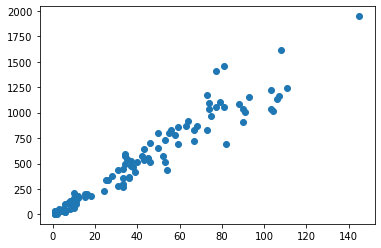

In [54]:
plt.scatter(perYard['Rec'],perYard['Yds'])